In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv('website_data.csv')

In [116]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [117]:
df.columns=df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [118]:
df = df.drop(index = 0).reset_index(drop = True)

In [119]:
df.columns=['channel group','Date_Hour','Users','Sessions','Engaged sessions','Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate','Event count']

In [120]:
df

,channel group,Date_Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   Date_Hour                            3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


We have to covert datatypes from object to numeric(int,float) and datetime

In [122]:
df["Date_Hour"] = pd.to_datetime(df["Date_Hour"],format='%Y%m%d%H',errors='coerce')

In [123]:
df['Hour']=df['Date_Hour'].dt.hour

In [124]:
df[['Users','Sessions','Engaged sessions','Event count']]=df[['Users','Sessions','Engaged sessions','Event count']].astype(int)

In [125]:
df[['Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate']]=df[['Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate']].astype(float)

In [126]:
df.dtypes

channel group                                  object
Date_Hour                              datetime64[ns]
Users                                           int64
Sessions                                        int64
Engaged sessions                                int64
Average engagement time per session           float64
Engaged sessions per user                     float64
Events per session                            float64
Engagement rate                               float64
Event count                                     int64
Hour                                            int32
dtype: object

In [127]:
df.isnull().sum()

channel group                          0
Date_Hour                              0
Users                                  0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
Hour                                   0
dtype: int64

In [128]:
df.drop_duplicates()

,channel group,Date_Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


In this Data there is no-null values and no-duplicate values

# QUESTIONS :---

1) What patterns or trends can you observe in website sessions and users over
   time?
2) Which marketing channel brought the highest number of users to the website,
   and how can we use this insight to improve traffic from other sources?
3) Which channel has the highest average engagement time, and what does that
   tell us about user behavior and content effectiveness?
4) How does engagement rate vary across different traffic channels?
5) Which channels are driving more engaged sessions compared to non-engaged
   ones, and what strategies can improve engagement in underperforming
   channels?

# Sessions and users over time

In [129]:
sns.set(style='whitegrid')

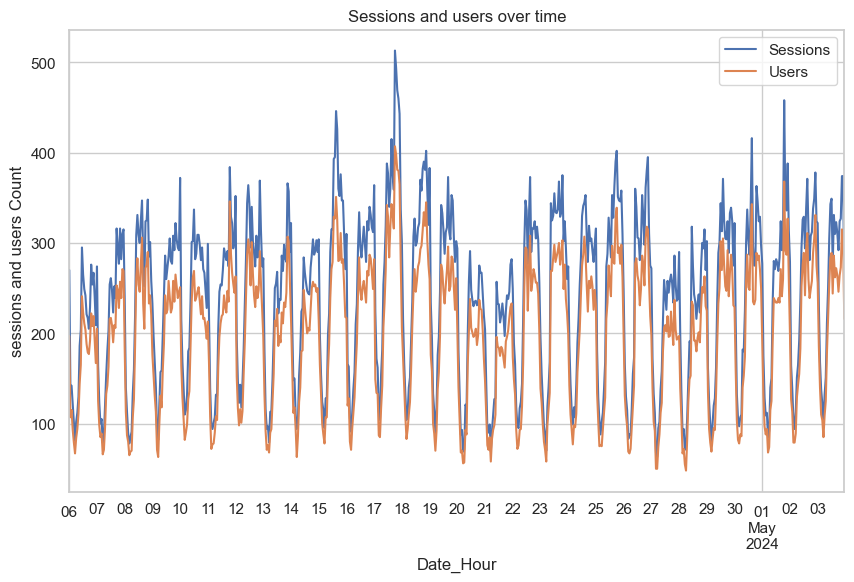

In [132]:
plt.figure(figsize=(10,6))
df.groupby('Date_Hour')[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.ylabel("sessions and users Count")
plt.show()

# Total users by channel

In [133]:
df.groupby('channel group')['Users'].sum()

channel group
Direct            30042
Email                 2
Organic Search    28387
Organic Social    47572
Organic Video       123
Referral          26774
Unassigned          540
Name: Users, dtype: int64

Text(0.5, 1.0, 'Total users by channel')

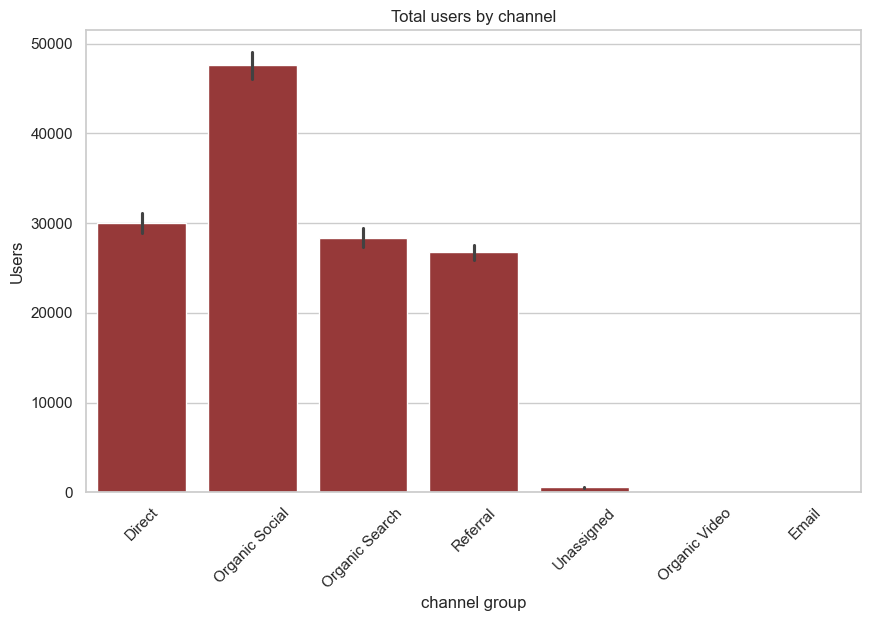

In [134]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='channel group',y='Users',estimator=np.sum,color='brown')
plt.xticks(rotation=45)
plt.title("Total users by channel")

# Average engagement time by channel

C:\Users\dipes\AppData\Local\Temp\ipykernel_9240\3612494214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel group',y='Average engagement time per session',data=df,estimator=np.mean,palette='magma')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

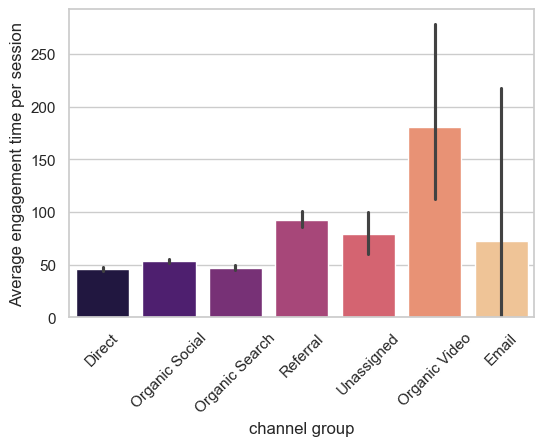

In [135]:
plt.figure(figsize=(6,4))

sns.barplot(x='channel group',y='Average engagement time per session',data=df,estimator=np.mean,palette='magma')
plt.xticks(rotation=45)

# Engagement with different traffic channels

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

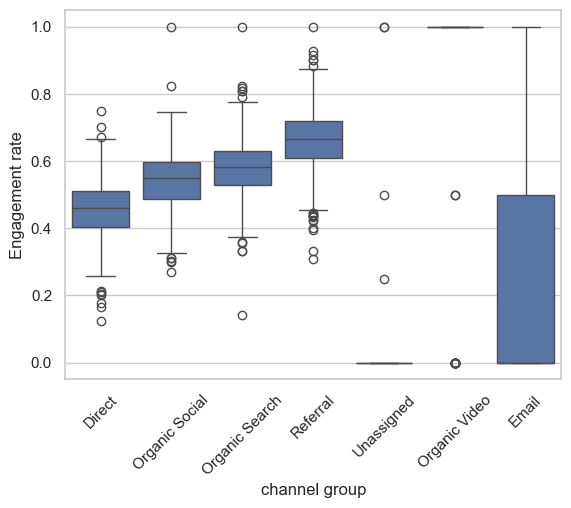

In [136]:
sns.boxplot(x='channel group',y='Engagement rate',data=df)
plt.xticks(rotation=45)

# Engaged sessions Vs non-engaged session

In [137]:
df.head()

,channel group,Date_Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [138]:
df2=df.groupby("channel group")[['Sessions','Engaged sessions']].sum().reset_index()
df2['non-engaged session']=df2['Sessions']-df2['Engaged sessions']


In [139]:
df2

,channel group,Sessions,Engaged sessions,non-engaged session
0,Direct,37203,17243,19960
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60627,32697,27930
4,Organic Video,141,109,32
5,Referral,30990,20653,10337
6,Unassigned,559,4,555


In [140]:
df2_melt=df2.melt(id_vars=['channel group'],value_vars=['Engaged sessions','non-engaged session'])

In [141]:
df2_melt

,channel group,variable,value
0,Direct,Engaged sessions,17243
1,Email,Engaged sessions,1
2,Organic Search,Engaged sessions,19425
3,Organic Social,Engaged sessions,32697
4,Organic Video,Engaged sessions,109
5,Referral,Engaged sessions,20653
6,Unassigned,Engaged sessions,4
7,Direct,non-engaged session,19960
8,Email,non-engaged session,2
9,Organic Search,non-engaged session,13947


Text(0.5, 1.0, 'Engaged sessions Vs Non-Engaged session')

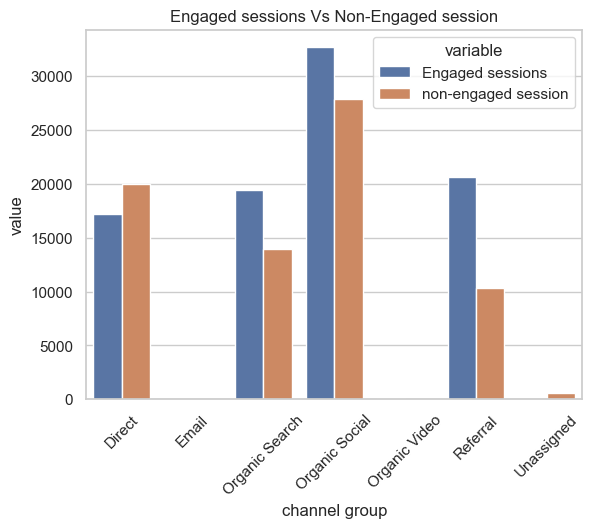

In [142]:
sns.barplot(data=df2_melt,x='channel group',y= 'value',hue='variable')
plt.xticks(rotation = 45)
plt.title('Engaged sessions Vs Non-Engaged session')